# 第7章のソースコード

## リスト7.2: 量子コンピュータを実行するプログラム(実行する毎に結果は変化します)

In [1]:
import time
from braket.circuits import Circuit
from braket.aws import AwsDevice

# 実行結果を出力するS3のバケット名とプレフィックス
bucket = "amazon-braket-★環境合わせて設定する★"
prefix = "★環境合わせて設定する★"
s3_folder = (bucket, prefix)

# 量子回路の組み立て
circuit = Circuit().h(0).cnot(0, 1)

# 実行
device = AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-8")
task = device.run(circuit, s3_folder, shots=1000)

# 実行が終了するまで待機
start_time = time.time()
state = task.state()
while state not in ["COMPLETED", "FAILED", "CANCELLED"]:
    time.sleep(10)
    state = task.state()
    print(f"{int(time.time()-start_time)} s, state={state}")

# 実行結果を取得
result = task.result()

# 実行結果をテキスト表示
counts = result.measurement_counts
print(counts)

10 s, state=QUEUED
20 s, state=COMPLETED
Counter({'11': 476, '00': 435, '01': 64, '10': 25})


## リスト7.4: ヒストグラム表示

Text(0, 0.5, 'counts')

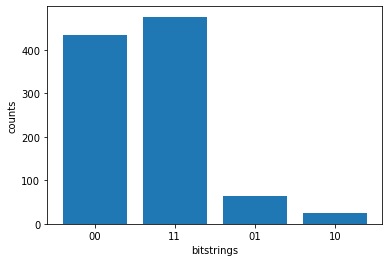

In [2]:
import matplotlib.pyplot as plt

# ヒストグラム表示
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')